## 11. Sprint 11. Aprenentatge Supervisat - Classificació

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 

%matplotlib inline
pd.set_option('display.max_columns', None)


## Exercise 1

Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay). Consider whether the flight arrived late or not (ArrDelay> 0).

In [2]:
dataset= pd.read_csv('DelayedFlights2.csv')

In [3]:
# Small database to shorten computation time for the sole purpose of trying different models
df=dataset.sample(5000)

In [4]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1879777,6851957,2008,12,1,1,1739.0,1720,1922.0,1905,NW,161,N594NW,223.0,225.0,207.0,17.0,19.0,MSP,SEA,1399,3.0,13.0,0,N,0,17.0,0.0,0.0,0.0,0.0
1857883,6793791,2008,12,7,7,811.0,635,1015.0,854,FL,868,N949AT,124.0,139.0,100.0,81.0,96.0,PHL,ATL,665,13.0,11.0,0,N,0,81.0,0.0,0.0,0.0,0.0
1077758,3587077,2008,6,6,5,1732.0,1717,1837.0,1838,DL,751,N622DL,185.0,201.0,165.0,-1.0,15.0,ATL,DEN,1199,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1237455,4144057,2008,7,20,7,1722.0,1700,1919.0,1900,AA,2085,N498AA,177.0,180.0,150.0,19.0,22.0,BOS,STL,1046,3.0,24.0,0,N,0,0.0,0.0,16.0,0.0,3.0
1398014,4751772,2008,8,19,2,1122.0,1110,1446.0,1435,AA,1726,N453AA,144.0,145.0,123.0,11.0,12.0,DFW,CMH,927,7.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709409,6353348,2008,11,3,1,1315.0,1150,1543.0,1416,9E,5813,91669E,148.0,146.0,100.0,87.0,85.0,LGA,CVG,585,5.0,43.0,0,N,0,0.0,0.0,2.0,0.0,85.0
745334,2442339,2008,5,19,1,2019.0,1930,2301.0,2225,WN,873,N664WN,102.0,115.0,85.0,36.0,49.0,LAS,DEN,629,5.0,12.0,0,N,0,36.0,0.0,0.0,0.0,0.0
1824782,6709423,2008,12,14,7,1835.0,1820,2035.0,2028,US,1895,N529AU,120.0,128.0,82.0,7.0,15.0,EWR,CLT,529,14.0,24.0,0,N,0,NaN,NaN,NaN,NaN,NaN
432533,1337465,2008,3,18,2,730.0,715,828.0,802,OH,5030,N443CA,58.0,47.0,38.0,26.0,15.0,LEX,CVG,70,3.0,17.0,0,N,0,15.0,0.0,11.0,0.0,0.0


In [5]:
# Checking for Nan

df.isna().sum()

Unnamed: 0              0
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                19
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime      23
CRSElapsedTime          0
AirTime                23
ArrDelay               23
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                 19
TaxiOut                 2
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay         1791
WeatherDelay         1791
NASDelay             1791
SecurityDelay        1791
LateAircraftDelay    1791
dtype: int64

In [6]:
# Interpolating ArrDelay with median

df['ArrDelay']=df['ArrDelay'].fillna(df['ArrDelay'].median())

In [7]:
# Creating another column ArrDelay with binary data

df.loc[df['ArrDelay'] <= 0, 'ArrDelay_bin'] = 0
df.loc[df['ArrDelay']> 0, 'ArrDelay_bin'] = 1

In [8]:
# Checking column names

df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'ArrDelay_bin'],
      dtype='object')

In [9]:
# Dropping some unnecessary columns

var= ['Unnamed: 0', 'Year', 'FlightNum', 'TailNum','CancellationCode','Cancelled','Diverted','UniqueCarrier', 'Origin','Dest','ArrDelay']

In [10]:
df=df.drop(columns=var)

In [11]:
# Filling Nan with median

fill=[ 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrTime','TaxiIn','TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'] 

In [12]:
df[fill]=df[fill].fillna(df[fill].median())

In [13]:
# Categorising some columns

cat=['Month', 'DayofMonth', 'DayOfWeek']

In [14]:
df[cat] = df[cat].astype('category')

In [15]:
# Changing new column to integer

df['ArrDelay_bin']=df['ArrDelay_bin'].astype('int')

In [16]:
# Checking dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1879777 to 1585283
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Month              5000 non-null   category
 1   DayofMonth         5000 non-null   category
 2   DayOfWeek          5000 non-null   category
 3   DepTime            5000 non-null   float64 
 4   CRSDepTime         5000 non-null   int64   
 5   ArrTime            5000 non-null   float64 
 6   CRSArrTime         5000 non-null   int64   
 7   ActualElapsedTime  5000 non-null   float64 
 8   CRSElapsedTime     5000 non-null   float64 
 9   AirTime            5000 non-null   float64 
 10  DepDelay           5000 non-null   float64 
 11  Distance           5000 non-null   int64   
 12  TaxiIn             5000 non-null   float64 
 13  TaxiOut            5000 non-null   float64 
 14  CarrierDelay       5000 non-null   float64 
 15  WeatherDelay       5000 non-null   float64 
 1

In [17]:
# Creating target variable for Machine Learning. 

y=df.pop('ArrDelay_bin')

In [18]:
y

1879777    1
1857883    1
1077758    0
1237455    1
1398014    1
          ..
1709409    1
745334     1
1824782    1
432533     1
1585283    1
Name: ArrDelay_bin, Length: 5000, dtype: int32

In [19]:
# Creating features after some engeneering.

X=df

In [20]:
X

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1879777,12,1,1,1739.0,1720,1922.0,1905,223.0,225.0,207.0,19.0,1399,3.0,13.0,17.0,0.0,0.0,0.0,0.0
1857883,12,7,7,811.0,635,1015.0,854,124.0,139.0,100.0,96.0,665,13.0,11.0,81.0,0.0,0.0,0.0,0.0
1077758,6,6,5,1732.0,1717,1837.0,1838,185.0,201.0,165.0,15.0,1199,5.0,15.0,2.0,0.0,1.0,0.0,8.0
1237455,7,20,7,1722.0,1700,1919.0,1900,177.0,180.0,150.0,22.0,1046,3.0,24.0,0.0,0.0,16.0,0.0,3.0
1398014,8,19,2,1122.0,1110,1446.0,1435,144.0,145.0,123.0,12.0,927,7.0,14.0,2.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709409,11,3,1,1315.0,1150,1543.0,1416,148.0,146.0,100.0,85.0,585,5.0,43.0,0.0,0.0,2.0,0.0,85.0
745334,5,19,1,2019.0,1930,2301.0,2225,102.0,115.0,85.0,49.0,629,5.0,12.0,36.0,0.0,0.0,0.0,0.0
1824782,12,14,7,1835.0,1820,2035.0,2028,120.0,128.0,82.0,15.0,529,14.0,24.0,2.0,0.0,1.0,0.0,8.0
432533,3,18,2,730.0,715,828.0,802,58.0,47.0,38.0,15.0,70,3.0,17.0,15.0,0.0,11.0,0.0,0.0


In [21]:
# Dividing database with Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
y_test

1129774    1
1546001    1
1712978    1
1924923    1
142026     0
          ..
1646878    1
175095     1
1245009    1
1074877    1
1196884    1
Name: ArrDelay_bin, Length: 1500, dtype: int32

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier 


In [24]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = tree.predict(X_test)

### KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred_knn= knn.predict(X_test)

### C-Support Vector Classification.

In [28]:
from sklearn import svm

In [29]:
svm = svm.SVC(kernel='linear')


In [30]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred_svm = svm.predict(X_test)

## Exercise 2 and 4

Compare classification models using accuracy, a confidence matrix, and other more advanced metrics. Compare your performance using the traint / test or cross-validation approach

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, hamming_loss, classification_report,  zero_one_loss, log_loss, matthews_corrcoef, roc_auc_score, confusion_matrix, roc_curve

### Decision Tree Classifier

In [33]:
print ("Tests for Decision Tree classifer:\n")

print ("Accuracy", accuracy_score(y_test, y_pred_tree).round(2))
print ("Precision score", precision_score(y_test, y_pred_tree).round(2))
print ("Recall score",recall_score(y_test, y_pred_tree).round(2))
print ("F1 score",f1_score(y_test, y_pred_tree).round(2))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_tree).round(2))

Tests for Decision Tree classifer:

Accuracy 0.91
Precision score 0.94
Recall score 0.96
F1 score 0.95
AUC&ROC 0.73


In [34]:
con_max_tree=confusion_matrix(y_test, y_pred_tree)
con_max_tree


array([[  86,   84],
       [  56, 1274]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

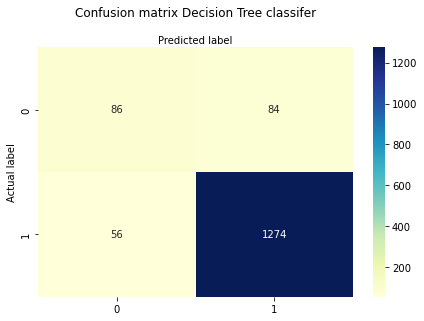

In [35]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_max_tree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree classifer', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

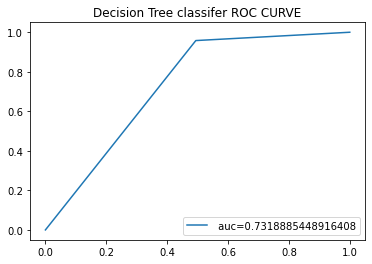

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_tree)
auc = roc_auc_score(y_test, y_pred_tree)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.title("Decision Tree classifer ROC CURVE")
plt.legend(loc=4)
plt.show()

### KNeighbors Classifier

In [37]:
print ("Tests for KNeighbors Classifier:\n")
print

print ("Accuracy", accuracy_score(y_test, y_pred_knn).round(2))
print ("Precision score", precision_score(y_test, y_pred_knn).round(2))
print ("Recall score",recall_score(y_test, y_pred_knn).round(2))
print ("F1 score",f1_score(y_test, y_pred_knn).round(2))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_knn).round(2))




Tests for KNeighbors Classifier:

Accuracy 0.92
Precision score 0.93
Recall score 0.99
F1 score 0.96
AUC&ROC 0.7


In [38]:
con_max_knn=confusion_matrix(y_test, y_pred_knn)
con_max_knn

array([[  71,   99],
       [  16, 1314]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

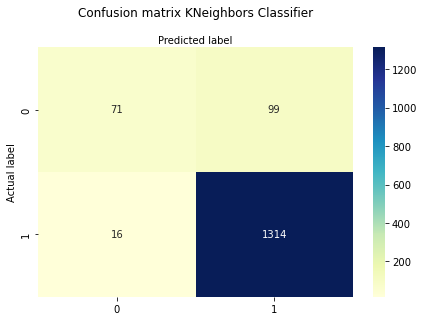

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_max_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNeighbors Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

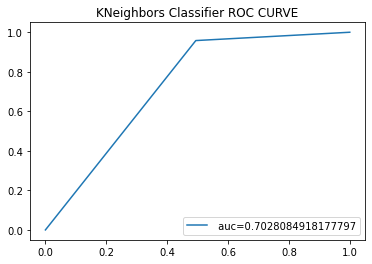

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_tree)
auc = roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.title("KNeighbors Classifier ROC CURVE")
plt.legend(loc=4)
plt.show()

### C-Support Vector Classification.

In [41]:
print ("Tests for Support Vector Classification:\n")

print ("Accuracy", accuracy_score(y_test, y_pred_svm).round(2))
print ("Precision score", precision_score(y_test, y_pred_svm).round(2))
print ("Recall score",recall_score(y_test, y_pred_svm).round(2))
print ("F1 score",f1_score(y_test, y_pred_svm).round(2))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_svm).round(2))

Tests for Support Vector Classification:

Accuracy 0.97
Precision score 0.97
Recall score 0.99
F1 score 0.98
AUC&ROC 0.89


In [42]:
con_max_svm=confusion_matrix(y_test, y_pred_svm)
con_max_svm

array([[ 136,   34],
       [  17, 1313]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

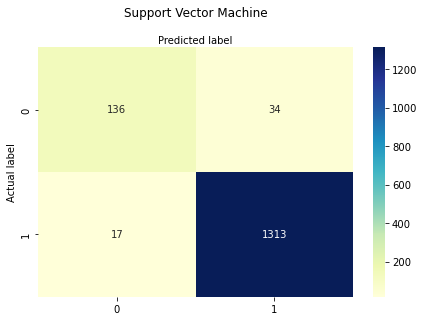

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_max_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

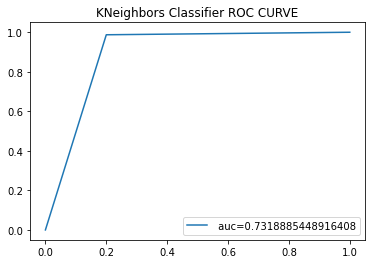

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
auc = roc_auc_score(y_test, y_pred_tree)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.title("KNeighbors Classifier ROC CURVE")
plt.legend(loc=4)
plt.show()

### Example of evaluation valuate a score by cross-validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import svm


In [46]:
svm = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(svm, X, y, cv=5)
scores

array([0.987, 0.97 , 0.976, 0.981, 0.983])

In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01


### Example of K-Folds cross-validator

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
kfold = KFold(n_splits=3)

In [50]:
result = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.979200798495763


### Conclusion

C-Support Vector Classification is the model with the best performance with a F1 of 0.98.

## Exercise 3 

Train them using the different parameters they support. 

In [52]:
# Importing GridSearchCv and Time

from sklearn.model_selection import GridSearchCV
import time

### Decision Tree Classifier

In [53]:
# Printing keys
tree.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [54]:
# Defining parameters grid

criterion=["gini", "entropy"]
splitter=["best", "random"]
max_features=["auto", "sqrt", "log2"]
param_grid = dict(criterion=criterion,splitter=splitter,max_features=max_features)

In [55]:
# Applying parameters

grid = GridSearchCV(estimator=tree, param_grid=param_grid)

start_time = time.time()
grid_result = grid.fit(X, y)

# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.889800 using {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
Execution time: 0.3840510845184326 ms


### KNeighbors Classifier

In [56]:
# Printing parameters keys

knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
# Defining parameters grid

n_neighbors=[2,3,4,5,6,7,8,9,10]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]
param_grid = dict(n_neighbors=n_neighbors,weights=weights, algorithm=algorithm, p=p)

In [58]:
# Applying parameters

grid = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)

# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.897200 using {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Execution time: 11.676779747009277 ms


## C-Support Vector Classification

In [59]:
# Printing parameters keys

svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [60]:
from sklearn import svm
from sklearn.svm import SVC

In [61]:
svm = svm.SVC(kernel='linear')

In [62]:
# Defining parameters grid (not aplyied due to the long time processing requiered)

C=[1,2,3,4,5]
kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

param_grid = dict(C=C,kernel=kernel)

In [63]:
# Applying parameters

#grid_3 = GridSearchCV(estimator=svm, param_grid=param_grid)

#start_time = time.time()


In [ ]:
#grid_result = grid_3.fit(X, y)
# Summarize results

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

## Exercise 5

Perform some variable engineering process to improve prediction

In [65]:
# Making copy of database

df2=df.copy()

In [66]:
df2

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1879777,12,1,1,1739.0,1720,1922.0,1905,223.0,225.0,207.0,19.0,1399,3.0,13.0,17.0,0.0,0.0,0.0,0.0
1857883,12,7,7,811.0,635,1015.0,854,124.0,139.0,100.0,96.0,665,13.0,11.0,81.0,0.0,0.0,0.0,0.0
1077758,6,6,5,1732.0,1717,1837.0,1838,185.0,201.0,165.0,15.0,1199,5.0,15.0,2.0,0.0,1.0,0.0,8.0
1237455,7,20,7,1722.0,1700,1919.0,1900,177.0,180.0,150.0,22.0,1046,3.0,24.0,0.0,0.0,16.0,0.0,3.0
1398014,8,19,2,1122.0,1110,1446.0,1435,144.0,145.0,123.0,12.0,927,7.0,14.0,2.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709409,11,3,1,1315.0,1150,1543.0,1416,148.0,146.0,100.0,85.0,585,5.0,43.0,0.0,0.0,2.0,0.0,85.0
745334,5,19,1,2019.0,1930,2301.0,2225,102.0,115.0,85.0,49.0,629,5.0,12.0,36.0,0.0,0.0,0.0,0.0
1824782,12,14,7,1835.0,1820,2035.0,2028,120.0,128.0,82.0,15.0,529,14.0,24.0,2.0,0.0,1.0,0.0,8.0
432533,3,18,2,730.0,715,828.0,802,58.0,47.0,38.0,15.0,70,3.0,17.0,15.0,0.0,11.0,0.0,0.0


In [68]:
y_2=y

In [69]:
y_2

1879777    1
1857883    1
1077758    0
1237455    1
1398014    1
          ..
1709409    1
745334     1
1824782    1
432533     1
1585283    1
Name: ArrDelay_bin, Length: 5000, dtype: int32

In [70]:
X_2=df2

In [71]:
X_2

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1879777,12,1,1,1739.0,1720,1922.0,1905,223.0,225.0,207.0,19.0,1399,3.0,13.0,17.0,0.0,0.0,0.0,0.0
1857883,12,7,7,811.0,635,1015.0,854,124.0,139.0,100.0,96.0,665,13.0,11.0,81.0,0.0,0.0,0.0,0.0
1077758,6,6,5,1732.0,1717,1837.0,1838,185.0,201.0,165.0,15.0,1199,5.0,15.0,2.0,0.0,1.0,0.0,8.0
1237455,7,20,7,1722.0,1700,1919.0,1900,177.0,180.0,150.0,22.0,1046,3.0,24.0,0.0,0.0,16.0,0.0,3.0
1398014,8,19,2,1122.0,1110,1446.0,1435,144.0,145.0,123.0,12.0,927,7.0,14.0,2.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709409,11,3,1,1315.0,1150,1543.0,1416,148.0,146.0,100.0,85.0,585,5.0,43.0,0.0,0.0,2.0,0.0,85.0
745334,5,19,1,2019.0,1930,2301.0,2225,102.0,115.0,85.0,49.0,629,5.0,12.0,36.0,0.0,0.0,0.0,0.0
1824782,12,14,7,1835.0,1820,2035.0,2028,120.0,128.0,82.0,15.0,529,14.0,24.0,2.0,0.0,1.0,0.0,8.0
432533,3,18,2,730.0,715,828.0,802,58.0,47.0,38.0,15.0,70,3.0,17.0,15.0,0.0,11.0,0.0,0.0


In [72]:
X_2.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [73]:
X_2

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1879777,12,1,1,1739.0,1720,1922.0,1905,223.0,225.0,207.0,19.0,1399,3.0,13.0,17.0,0.0,0.0,0.0,0.0
1857883,12,7,7,811.0,635,1015.0,854,124.0,139.0,100.0,96.0,665,13.0,11.0,81.0,0.0,0.0,0.0,0.0
1077758,6,6,5,1732.0,1717,1837.0,1838,185.0,201.0,165.0,15.0,1199,5.0,15.0,2.0,0.0,1.0,0.0,8.0
1237455,7,20,7,1722.0,1700,1919.0,1900,177.0,180.0,150.0,22.0,1046,3.0,24.0,0.0,0.0,16.0,0.0,3.0
1398014,8,19,2,1122.0,1110,1446.0,1435,144.0,145.0,123.0,12.0,927,7.0,14.0,2.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709409,11,3,1,1315.0,1150,1543.0,1416,148.0,146.0,100.0,85.0,585,5.0,43.0,0.0,0.0,2.0,0.0,85.0
745334,5,19,1,2019.0,1930,2301.0,2225,102.0,115.0,85.0,49.0,629,5.0,12.0,36.0,0.0,0.0,0.0,0.0
1824782,12,14,7,1835.0,1820,2035.0,2028,120.0,128.0,82.0,15.0,529,14.0,24.0,2.0,0.0,1.0,0.0,8.0
432533,3,18,2,730.0,715,828.0,802,58.0,47.0,38.0,15.0,70,3.0,17.0,15.0,0.0,11.0,0.0,0.0


### Scaling dataset

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
trans= StandardScaler()
data= trans.fit_transform(X_2)
new_X=pd.DataFrame(data)
new_X.columns=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [76]:
data

array([[ 1.69990155, -1.67212381, -1.5059887 , ..., -0.3454071 ,
        -0.04128477, -0.55632558],
       [ 1.69990155, -0.99491299,  1.50297973, ..., -0.3454071 ,
        -0.04128477, -0.55632558],
       [-0.02204086, -1.10778146,  0.49999025, ..., -0.31231579,
        -0.04128477, -0.32387918],
       ...,
       [ 1.69990155, -0.2048337 ,  1.50297973, ..., -0.31231579,
        -0.04128477, -0.32387918],
       [-0.88301207,  0.24664018, -1.00449396, ...,  0.01859732,
        -0.04128477, -0.55632558],
       [ 1.12592075,  0.923851  ,  0.49999025, ...,  0.25023649,
        -0.04128477,  3.8601559 ]])

In [77]:
new_X

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.699902,-1.672124,-1.505989,0.485634,0.596837,0.563777,0.575670,1.285796,1.291983,1.474622,-0.444851,1.127768,-0.711850,-0.389311,0.088953,-0.13557,-0.345407,-0.041285,-0.556326
1,1.699902,-0.994913,1.502980,-1.567145,-1.964880,-1.095753,-1.729311,-0.115772,0.076449,-0.106671,0.912358,-0.164899,1.144343,-0.541130,1.679256,-0.13557,-0.345407,-0.041285,-0.556326
2,-0.022041,-1.107781,0.499990,0.470150,0.589754,0.408253,0.428730,0.747820,0.952764,0.853928,-0.515355,0.775543,-0.340611,-0.237491,-0.283775,-0.13557,-0.312316,-0.041285,-0.323879
3,0.264950,0.472377,1.502980,0.448029,0.549616,0.558288,0.564704,0.634562,0.655948,0.632251,-0.391973,0.506091,-0.711850,0.445697,-0.333472,-0.13557,0.184054,-0.041285,-0.469158
4,0.551940,0.359509,-1.004494,-0.879198,-0.843391,-0.307156,-0.455102,0.167373,0.161253,0.233233,-0.568233,0.296516,0.030627,-0.313401,-0.283775,-0.13557,-0.312316,-0.041285,-0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.412911,-1.446387,-1.505989,-0.452274,-0.748950,-0.129676,-0.496771,0.224002,0.175388,-0.106671,0.718471,-0.305789,-0.340611,1.887982,-0.333472,-0.13557,-0.279224,-0.041285,1.913417
4996,-0.309031,0.359509,-1.505989,1.105007,1.092653,1.257230,1.277472,-0.427232,-0.262770,-0.328347,0.083932,-0.228299,-0.340611,-0.465221,0.561074,-0.13557,-0.345407,-0.041285,-0.556326
4997,1.699902,-0.204834,1.502980,0.697990,0.832940,0.770532,0.845425,-0.172401,-0.079027,-0.372683,-0.515355,-0.404412,1.329962,0.445697,-0.283775,-0.13557,-0.312316,-0.041285,-0.323879
4998,-0.883012,0.246640,-1.004494,-1.746320,-1.775997,-1.437905,-1.843354,-1.050151,-1.223891,-1.022934,-0.515355,-1.212770,-0.711850,-0.085672,0.039256,-0.13557,0.018597,-0.041285,-0.556326


### Applying Decision Tree Classifier train and test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)

In [88]:
# Create Decision Tree classifer object
tree_2 = DecisionTreeClassifier(criterion='entropy', max_features= 'auto', splitter= 'best')

# Train Decision Tree Classifer
tree_2 = tree_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree_2 = tree_2.predict(X_test)

In [89]:
print ("Tests for Decision Tree classifer:\n")

print ("Accuracy", accuracy_score(y_test, y_pred_tree_2).round(2))
print ("Precision score", precision_score(y_test, y_pred_tree_2).round(2))
print ("Recall score",recall_score(y_test, y_pred_tree_2).round(2))
print ("F1 score",f1_score(y_test, y_pred_tree_2).round(2))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_tree_2).round(2))

Tests for Decision Tree classifer:

Accuracy 0.88
Precision score 0.92
Recall score 0.94
F1 score 0.93
AUC&ROC 0.66


After scalating the F1 is not better than before.

### Select features with SelectKBest according to the k highest scores.

In [81]:
from sklearn.feature_selection import SelectKBest,f_classif
X_2.shape

(5000, 19)

In [82]:
# Applying selector

selector = SelectKBest(f_classif, k=11)
selector.fit(X_2, y_2)

# Get columns to keep and create new dataframe with those only

cols = selector.get_support(indices=True)
features_df_new = X_2.iloc[:,cols]

The engineered dataset after applying SelectBest will be tested in the next exercise.

## Exercise 6

Do not use the DepDelay variable when making predictions

### Testing againg Decision Tree classifer after engineering

In [83]:
features_df_new

,DepTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,NASDelay,LateAircraftDelay
1879777,1739.0,223.0,225.0,207.0,19.0,1399,3.0,13.0,17.0,0.0,0.0
1857883,811.0,124.0,139.0,100.0,96.0,665,13.0,11.0,81.0,0.0,0.0
1077758,1732.0,185.0,201.0,165.0,15.0,1199,5.0,15.0,2.0,1.0,8.0
1237455,1722.0,177.0,180.0,150.0,22.0,1046,3.0,24.0,0.0,16.0,3.0
1398014,1122.0,144.0,145.0,123.0,12.0,927,7.0,14.0,2.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
1709409,1315.0,148.0,146.0,100.0,85.0,585,5.0,43.0,0.0,2.0,85.0
745334,2019.0,102.0,115.0,85.0,49.0,629,5.0,12.0,36.0,0.0,0.0
1824782,1835.0,120.0,128.0,82.0,15.0,529,14.0,24.0,2.0,1.0,8.0
432533,730.0,58.0,47.0,38.0,15.0,70,3.0,17.0,15.0,11.0,0.0


In [84]:
# Dropping DepDelay

features_df_new=features_df_new.drop(labels=["DepDelay"], axis=1)

In [85]:
# New Train and Test

X_train, X_test, y_train, y_test = train_test_split(features_df_new, y_2, test_size=0.3, random_state=1)

In [90]:
# Create Decision Tree classifer object
tree_3 = DecisionTreeClassifier(criterion='entropy', max_features= 'auto', splitter= 'best')

# Train Decision Tree Classifer
tree_3 = tree_3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree_3 = tree_3.predict(X_test)

In [91]:
print ("Tests for Decision Tree classifer:\n")

print ("Accuracy", accuracy_score(y_test, y_pred_tree_3).round(2))
print ("Precision score", precision_score(y_test, y_pred_tree_3).round(2))
print ("Recall score",recall_score(y_test, y_pred_tree_3).round(2))
print ("F1 score",f1_score(y_test, y_pred_tree_3).round(2))
print ("AUC&ROC",roc_auc_score(y_test, y_pred_tree_3).round(2))

Tests for Decision Tree classifer:

Accuracy 0.88
Precision score 0.92
Recall score 0.94
F1 score 0.93
AUC&ROC 0.65


After selecting the best features and parameters, and removing DepDelay, F1 is similar.